In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [55]:
cctv_seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding='cp949', index_col=0)
cctv_seoul.head()

,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
NaN,계,"92,991","5,896","3,927","6,416","8,812","11,598","10,887","13,083","11,803","9,396","9,302","1,871"
1.0,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
2.0,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
3.0,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
4.0,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135


In [56]:
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,계,"92,991","5,896","3,927","6,416","8,812","11,598","10,887","13,083","11,803","9,396","9,302","1,871"
1,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
2,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
3,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
4,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135


In [57]:
cctv_seoul.drop([0], inplace=True)
cctv_seoul.head()

,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
2,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
3,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
4,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135
5,광진구,"3,592",130,176,95,40,666,460,712,190,738,273,112


In [58]:
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

,구분,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
1,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
2,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
3,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135
4,광진구,"3,592",130,176,95,40,666,460,712,190,738,273,112


In [59]:
cctv_seoul.columns

Index(['구분', '총계', '2014년 이전', '2014년', '2015년', '2016년', '2017년', '2018년',
       '2019년', '2020년', '2021년', '2022년', '2023년'],
      dtype='object')

In [60]:
cctv_seoul.columns[0]

'구분'

In [61]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"}, inplace=True)
cctv_seoul.head()

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
1,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
2,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
3,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135
4,광진구,"3,592",130,176,95,40,666,460,712,190,738,273,112


In [62]:
pop_seoul = pd.read_excel("../data/01. Seoul_Population.xlsx")
pop_seoul.head()

/home/j-hyungjun/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),2023 3/4,2023 3/4.1,2023 3/4.2,2023 3/4.3,2023 3/4.4,2023 3/4.5,2023 3/4.6,2023 3/4.7,...,2023 4/4.2,2023 4/4.3,2023 4/4.4,2023 4/4.5,2023 4/4.6,2023 4/4.7,2023 4/4.8,2023 4/4.9,2023 4/4.10,2023 4/4.11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),...,계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,...,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4475726,9655918,4660459,4995459,9407540,4552501,4855039,248378,...,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.1,1743696
3,NaN,종로구,72304,151127,72222,78905,139945,67625,72320,11182,...,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
4,NaN,중구,64609,131825,63661,68164,121405,58788,62617,10420,...,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920


In [63]:
pop_seoul = pd.read_excel("../data/01. Seoul_Population.xlsx",
                          header=2, usecols="B,D,G,J,N")
pop_seoul.head()

/home/j-hyungjun/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9655918,9407540,248378,1725801
1,종로구,151127,139945,11182,28610
2,중구,131825,121405,10420,25737
3,용산구,230692,216152,14540,39972
4,성동구,285543,278366,7177,48988


In [64]:
pop_seoul.rename(columns={pop_seoul.columns[0]:"구별",
                          pop_seoul.columns[1]:"인구수",
                          pop_seoul.columns[2]:"한국인",
                          pop_seoul.columns[3]:"외국인",
                          pop_seoul.columns[4]:"고령자"},
                          inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9655918,9407540,248378,1725801
1,종로구,151127,139945,11182,28610
2,중구,131825,121405,10420,25737
3,용산구,230692,216152,14540,39972
4,성동구,285543,278366,7177,48988


In [65]:
cctv_seoul.head()

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
1,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
2,용산구,"2,970",87,68,83,295,491,115,322,623,422,464,0
3,성동구,"4,175",157,110,366,281,942,457,643,485,367,232,135
4,광진구,"3,592",130,176,95,40,666,460,712,190,738,273,112


In [66]:
cctv_seoul.sort_values(by="총계", ascending=True).head(5)

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,"1,966",553,103,160,130,144,150,67,233,88,207,131
9,도봉구,"2,385",98,54,27,91,116,183,195,179,592,591,259
1,중 구,"2,584",217,77,236,240,372,386,155,361,403,137,0
10,노원구,"2,626",238,75,509,329,171,216,324,387,215,144,18
13,마포구,"2,638",61,109,170,458,376,368,494,298,177,117,10


In [67]:
cctv_seoul.sort_values(by="총계", ascending=False).head()

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
22,강남구,"7,243",121,573,826,1295,989,744,790,923,514,468,0
20,관악구,"5,642",592,277,448,607,675,663,889,404,549,135,403
21,서초구,"4,995",160,70,559,518,1054,426,344,422,566,876,0
7,성북구,"4,957",318,229,322,594,811,867,714,253,407,338,104
16,구로구,"4,831",307,160,263,351,559,542,789,652,689,341,178


In [68]:
cctv_seoul["최근증가율"] = (
    (cctv_seoul["2023년"] + cctv_seoul["2023년"])
    /cctv_seoul.iloc[:,2:10].sum(axis=1) * 100
)

cctv_seoul.sort_values(by="최근증가율", ascending=False).head(5)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [69]:
cctv_seoul.iloc[:,2:10].dtypes

2014년 이전    object
2014년       object
2015년       object
2016년       object
2017년       object
2018년       object
2019년       object
2020년       object
dtype: object

In [70]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   총계        25 non-null     object
 2   2014년 이전  24 non-null     object
 3   2014년     25 non-null     object
 4   2015년     25 non-null     object
 5   2016년     25 non-null     object
 6   2017년     25 non-null     object
 7   2018년     25 non-null     object
 8   2019년     25 non-null     object
 9   2020년     25 non-null     object
 10  2021년     25 non-null     object
 11  2022년     25 non-null     object
 12  2023년     22 non-null     object
dtypes: object(13)
memory usage: 2.7+ KB


In [71]:
cctv_seoul = cctv_seoul.astype(dtype={'총계':'int'},
                               errors='raise',
                               copy=True)
cctv_seoul

ValueError: invalid literal for int() with base 10: '1,966': Error while type casting for column '총계'

In [72]:
cctv_seoul['총계'] = cctv_seoul.총계.str.replace(',','')
cctv_seoul

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,1966,553,103,160,130,144,150,67,233,88,207,131
1,중 구,2584,217,77,236,240,372,386,155,361,403,137,0
2,용산구,2970,87,68,83,295,491,115,322,623,422,464,0
3,성동구,4175,157,110,366,281,942,457,643,485,367,232,135
4,광진구,3592,130,176,95,40,666,460,712,190,738,273,112
5,동대문구,2759,3,5,72,774,702,201,218,229,229,317,9
6,중랑구,4193,555,104,145,153,170,215,1074,976,507,294,NaN
7,성북구,4957,318,229,322,594,811,867,714,253,407,338,104
8,강북구,3321,21,16,68,210,4,375,963,569,298,797,NaN
9,도봉구,2385,98,54,27,91,116,183,195,179,592,591,259


In [73]:
convert_col_name = ['2014년 이전', '2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년','2023년']

for name in convert_col_name :
    cctv_seoul[name] = cctv_seoul[name].str.replace(',','')

cctv_seoul

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,1966,553,103,160,130,144,150,67,233,88,207,131
1,중 구,2584,217,77,236,240,372,386,155,361,403,137,0
2,용산구,2970,87,68,83,295,491,115,322,623,422,464,0
3,성동구,4175,157,110,366,281,942,457,643,485,367,232,135
4,광진구,3592,130,176,95,40,666,460,712,190,738,273,112
5,동대문구,2759,3,5,72,774,702,201,218,229,229,317,9
6,중랑구,4193,555,104,145,153,170,215,1074,976,507,294,NaN
7,성북구,4957,318,229,322,594,811,867,714,253,407,338,104
8,강북구,3321,21,16,68,210,4,375,963,569,298,797,NaN
9,도봉구,2385,98,54,27,91,116,183,195,179,592,591,259


In [74]:
cctv_seoul = cctv_seoul.astype(dtype={'2014년 이전':'int',
                                      '2014년':'int',
                                      '2015년':'int',
                                      '2016년':'int',
                                      '2017년':'int',
                                      '2018년':'int',
                                      '2019년':'int',
                                      '2020년':'int',
                                      '2021년':'int',
                                      '2022년':'int',
                                      '2023년':'int'},
                                    errors='raise',
                                    copy=True)
cctv_seoul.dtypes

ValueError: cannot convert float NaN to integer: Error while type casting for column '2014년 이전'

In [75]:
cctv_seoul = cctv_seoul.fillna(0)
cctv_seoul

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,1966,553,103,160,130,144,150,67,233,88,207,131
1,중 구,2584,217,77,236,240,372,386,155,361,403,137,0
2,용산구,2970,87,68,83,295,491,115,322,623,422,464,0
3,성동구,4175,157,110,366,281,942,457,643,485,367,232,135
4,광진구,3592,130,176,95,40,666,460,712,190,738,273,112
5,동대문구,2759,3,5,72,774,702,201,218,229,229,317,9
6,중랑구,4193,555,104,145,153,170,215,1074,976,507,294,0
7,성북구,4957,318,229,322,594,811,867,714,253,407,338,104
8,강북구,3321,21,16,68,210,4,375,963,569,298,797,0
9,도봉구,2385,98,54,27,91,116,183,195,179,592,591,259


In [76]:
cctv_seoul = cctv_seoul.astype(dtype={'2014년 이전':'int',
                                      '2014년':'int',
                                      '2015년':'int',
                                      '2016년':'int',
                                      '2017년':'int',
                                      '2018년':'int',
                                      '2019년':'int',
                                      '2020년':'int',
                                      '2021년':'int',
                                      '2022년':'int',
                                      '2023년':'int'},
                                    errors='raise',
                                    copy=True)
cctv_seoul.dtypes

구별          object
총계          object
2014년 이전     int64
2014년        int64
2015년        int64
2016년        int64
2017년        int64
2018년        int64
2019년        int64
2020년        int64
2021년        int64
2022년        int64
2023년        int64
dtype: object

In [77]:
cctv_seoul['2020년 이전'] = cctv_seoul.iloc[:,2:10].sum(axis=1)
cctv_seoul.head()

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전
0,종로구,1966,553,103,160,130,144,150,67,233,88,207,131,1540
1,중 구,2584,217,77,236,240,372,386,155,361,403,137,0,2044
2,용산구,2970,87,68,83,295,491,115,322,623,422,464,0,2084
3,성동구,4175,157,110,366,281,942,457,643,485,367,232,135,3441
4,광진구,3592,130,176,95,40,666,460,712,190,738,273,112,2469


In [78]:
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2023년'] + cctv_seoul["2022년"] + cctv_seoul["2021년"])
    / cctv_seoul["2020년 이전"] * 100
)

cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전,최근증가율
9,도봉구,2385,98,54,27,91,116,183,195,179,592,591,259,943,152.916225
8,강북구,3321,21,16,68,210,4,375,963,569,298,797,0,2226,49.191375
15,강서구,3353,132,200,192,167,507,259,455,363,441,596,41,2275,47.384615
4,광진구,3592,130,176,95,40,666,460,712,190,738,273,112,2469,45.484002
2,용산구,2970,87,68,83,295,491,115,322,623,422,464,0,2084,42.514395


In [79]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,소계,9655918,9407540,248378,1725801
1,종로구,151127,139945,11182,28610
2,중구,131825,121405,10420,25737
3,용산구,230692,216152,14540,39972
4,성동구,285543,278366,7177,48988


In [80]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [81]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,151127,139945,11182,28610
2,중구,131825,121405,10420,25737
3,용산구,230692,216152,14540,39972
4,성동구,285543,278366,7177,48988
5,광진구,351959,336604,15355,56173


In [82]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [83]:
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,151127,139945,11182,28610,7.399075,18.931098
2,중구,131825,121405,10420,25737,7.904419,19.523611
3,용산구,230692,216152,14540,39972,6.302776,17.326999
4,성동구,285543,278366,7177,48988,2.513457,17.156085
5,광진구,351959,336604,15355,56173,4.362724,15.960098


In [84]:
pop_seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,661515,655744,5771,107605,0.872391,16.266449
16,강서구,569978,564339,5639,100929,0.989336,17.707526
23,강남구,546291,540957,5334,85288,0.976403,15.612192
11,노원구,504423,499989,4434,95384,0.879024,18.909526
21,관악구,500582,485172,15410,84664,3.078417,16.913113


In [85]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,416815,393929,22886,79150,5.490685,18.989240
19,영등포구,398290,375586,22704,66975,5.700369,16.815637
6,동대문구,359113,341238,17875,66440,4.977542,18.501140
21,관악구,500582,485172,15410,84664,3.078417,16.913113
5,광진구,351959,336604,15355,56173,4.362724,15.960098


In [86]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131825,121405,10420,25737,7.904419,19.523611
1,종로구,151127,139945,11182,28610,7.399075,18.931098
3,용산구,230692,216152,14540,39972,6.302776,17.326999
19,영등포구,398290,375586,22704,66975,5.700369,16.815637
18,금천구,242076,228611,13465,44793,5.562303,18.503693


In [87]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,661515,655744,5771,107605,0.872391,16.266449
16,강서구,569978,564339,5639,100929,0.989336,17.707526
11,노원구,504423,499989,4434,95384,0.879024,18.909526
12,은평구,471155,467098,4057,92820,0.861075,19.700523
23,강남구,546291,540957,5334,85288,0.976403,15.612192


In [88]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,294804,290155,4649,68119,1.576980,23.106539
10,도봉구,310133,307740,2393,69508,0.771604,22.412320
7,중랑구,387940,382797,5143,77949,1.325720,20.093056
12,은평구,471155,467098,4057,92820,0.861075,19.700523
2,중구,131825,121405,10420,25737,7.904419,19.523611


In [89]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,총계,2014년 이전,2014년,2015년,2016년,2017년,2018년,2019년,2020년,...,2022년,2023년,2020년 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1966,553,103,160,130,144,150,67,233,...,207,131,1540,27.662338,151127,139945,11182,28610,7.399075,18.931098
1,용산구,2970,87,68,83,295,491,115,322,623,...,464,0,2084,42.514395,230692,216152,14540,39972,6.302776,17.326999
2,성동구,4175,157,110,366,281,942,457,643,485,...,232,135,3441,21.331008,285543,278366,7177,48988,2.513457,17.156085
3,광진구,3592,130,176,95,40,666,460,712,190,...,273,112,2469,45.484002,351959,336604,15355,56173,4.362724,15.960098
4,동대문구,2759,3,5,72,774,702,201,218,229,...,317,9,2204,25.181488,359113,341238,17875,66440,4.977542,18.501140


In [90]:
del data_result["2014년 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
del data_result["2017년"]
del data_result["2018년"]
del data_result["2019년"]
del data_result["2020년"]
del data_result["2021년"]
del data_result["2022년"]
del data_result["2023년"]
del data_result["2020년 이전"]

data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1966,27.662338,151127,139945,11182,28610,7.399075,18.931098
1,용산구,2970,42.514395,230692,216152,14540,39972,6.302776,17.326999
2,성동구,4175,21.331008,285543,278366,7177,48988,2.513457,17.156085
3,광진구,3592,45.484002,351959,336604,15355,56173,4.362724,15.960098
4,동대문구,2759,25.181488,359113,341238,17875,66440,4.977542,18.501140


In [91]:
data_result.set_index("구별", inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1966,27.662338,151127,139945,11182,28610,7.399075,18.931098
용산구,2970,42.514395,230692,216152,14540,39972,6.302776,17.326999
성동구,4175,21.331008,285543,278366,7177,48988,2.513457,17.156085
광진구,3592,45.484002,351959,336604,15355,56173,4.362724,15.960098
동대문구,2759,25.181488,359113,341238,17875,66440,4.977542,18.501140


In [92]:
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.282663,0.439891,0.429837,0.067112,0.343612,-0.224970,-0.329045
최근증가율,-0.282663,1.000000,-0.219806,-0.203694,-0.247381,-0.060558,-0.157846,0.539986
인구수,0.439891,-0.219806,1.000000,0.998749,-0.264128,0.938555,-0.648395,-0.331006
한국인,0.429837,-0.203694,0.998749,1.000000,-0.312029,0.942437,-0.681910,-0.314117
외국인,0.067112,-0.247381,-0.264128,-0.312029,1.000000,-0.345421,0.833297,-0.230318
고령자,0.343612,-0.060558,0.938555,0.942437,-0.345421,1.000000,-0.716056,0.004921
외국인비율,-0.224970,-0.157846,-0.648395,-0.681910,0.833297,-0.716056,1.000000,-0.097336
고령자비율,-0.329045,0.539986,-0.331006,-0.314117,-0.230318,0.004921,-0.097336,1.000000


In [93]:
data_result.info() #check for data type

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 종로구 to 강동구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총계      24 non-null     object 
 1   최근증가율   24 non-null     float64
 2   인구수     24 non-null     int64  
 3   한국인     24 non-null     int64  
 4   외국인     24 non-null     int64  
 5   고령자     24 non-null     int64  
 6   외국인비율   24 non-null     float64
 7   고령자비율   24 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.7+ KB


In [94]:
data_result = data_result.astype(dtype={'총계':'float64'},
                                 errors='raise',
                                 copy=True)
data_result

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1966.0,27.662338,151127,139945,11182,28610,7.399075,18.931098
용산구,2970.0,42.514395,230692,216152,14540,39972,6.302776,17.326999
성동구,4175.0,21.331008,285543,278366,7177,48988,2.513457,17.156085
광진구,3592.0,45.484002,351959,336604,15355,56173,4.362724,15.960098
동대문구,2759.0,25.181488,359113,341238,17875,66440,4.977542,18.501140
중랑구,4193.0,23.614387,387940,382797,5143,77949,1.325720,20.093056
성북구,4957.0,20.666991,440089,427671,12418,79739,2.821702,18.118835
강북구,3321.0,49.191375,294804,290155,4649,68119,1.576980,23.106539
도봉구,2385.0,152.916225,310133,307740,2393,69508,0.771604,22.412320


In [95]:
data_result["CCTV비율"] = data_result["총계"] / data_result["인구수"] * 100
data_result.sort_values(by="CCTV비율", ascending=False).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
성동구,4175.0,21.331008,285543,278366,7177,48988,2.513457,17.156085,1.462127
강남구,7243.0,15.684395,546291,540957,5334,85288,0.976403,15.612192,1.325850
종로구,1966.0,27.662338,151127,139945,11182,28610,7.399075,18.931098,1.300893
용산구,2970.0,42.514395,230692,216152,14540,39972,6.302776,17.326999,1.287431
서초구,4995.0,40.585421,410766,406404,4362,64761,1.061918,15.765911,1.216021


In [96]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
송파구,3253.0,26.477449,661515,655744,5771,107605,0.872391,16.266449,0.491750
노원구,2626.0,16.763006,504423,499989,4434,95384,0.879024,18.909526,0.520595
강서구,3353.0,47.384615,569978,564339,5639,100929,0.989336,17.707526,0.588268
동작구,2690.0,18.973905,390740,380154,10586,69944,2.709218,17.900394,0.688437
강동구,3192.0,29.756098,462453,458385,4068,81739,0.879657,17.675093,0.690232


In [97]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1966.0,27.662338,151127,139945,11182,28610,7.399075,18.931098,1.300893
용산구,2970.0,42.514395,230692,216152,14540,39972,6.302776,17.326999,1.287431
성동구,4175.0,21.331008,285543,278366,7177,48988,2.513457,17.156085,1.462127
광진구,3592.0,45.484002,351959,336604,15355,56173,4.362724,15.960098,1.020573
동대문구,2759.0,25.181488,359113,341238,17875,66440,4.977542,18.501140,0.768282


<Axes: ylabel='구별'>

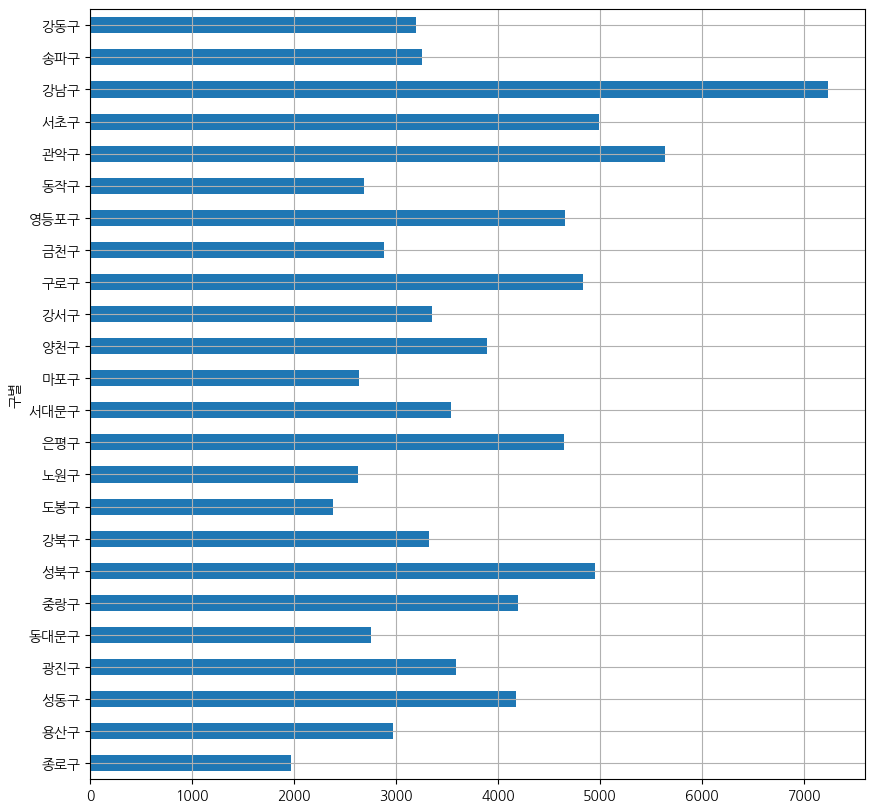

In [51]:
plt.rcParams['font.family'] = 'NanumGothic'

data_result["총계"].plot(kind="barh", grid=True, figsize=(10, 10))

In [52]:
def drawGraph6():
    plt.rcParams['font.family'] = 'NanumGothic'

    data_result["총계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 6)
    )

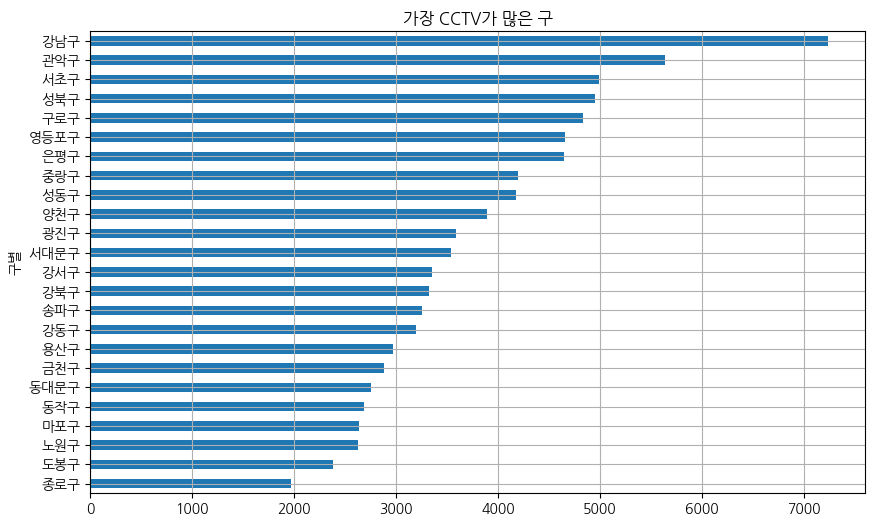

In [53]:
drawGraph6()

In [54]:
def drawGraph7():
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["총계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

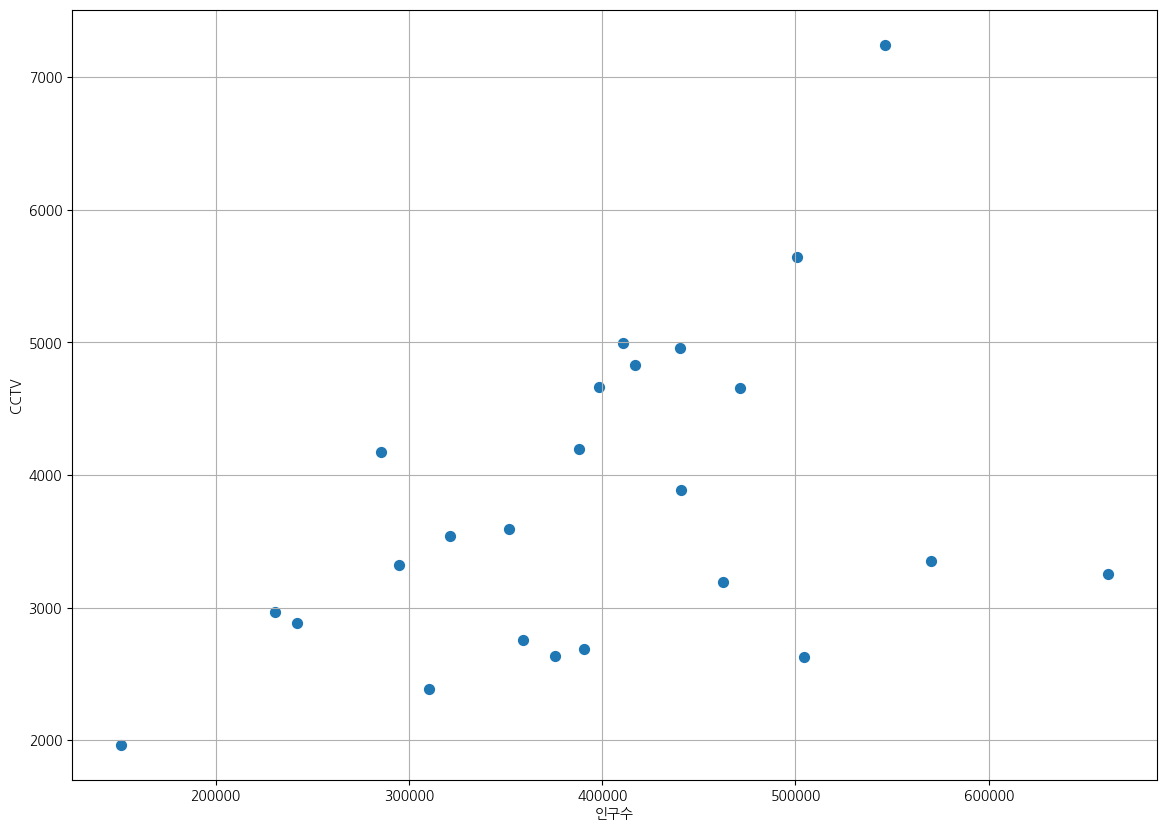

In [55]:
drawGraph7()

In [56]:
fp1 = np.polyfit(data_result["인구수"], data_result["총계"], 1)
fp1

array([4.59828792e-03, 1.94218659e+03])

In [57]:
f1 = np.poly1d(fp1)

In [58]:
f1(400000)

3781.5017600400856

In [88]:
fx = np.linspace(100000, 700000, 100)

In [91]:
len(fx)

100

In [100]:
def drawGraph8():
    plt.rcParams['font.family'] = 'NanumGothic'

    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["총계"], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

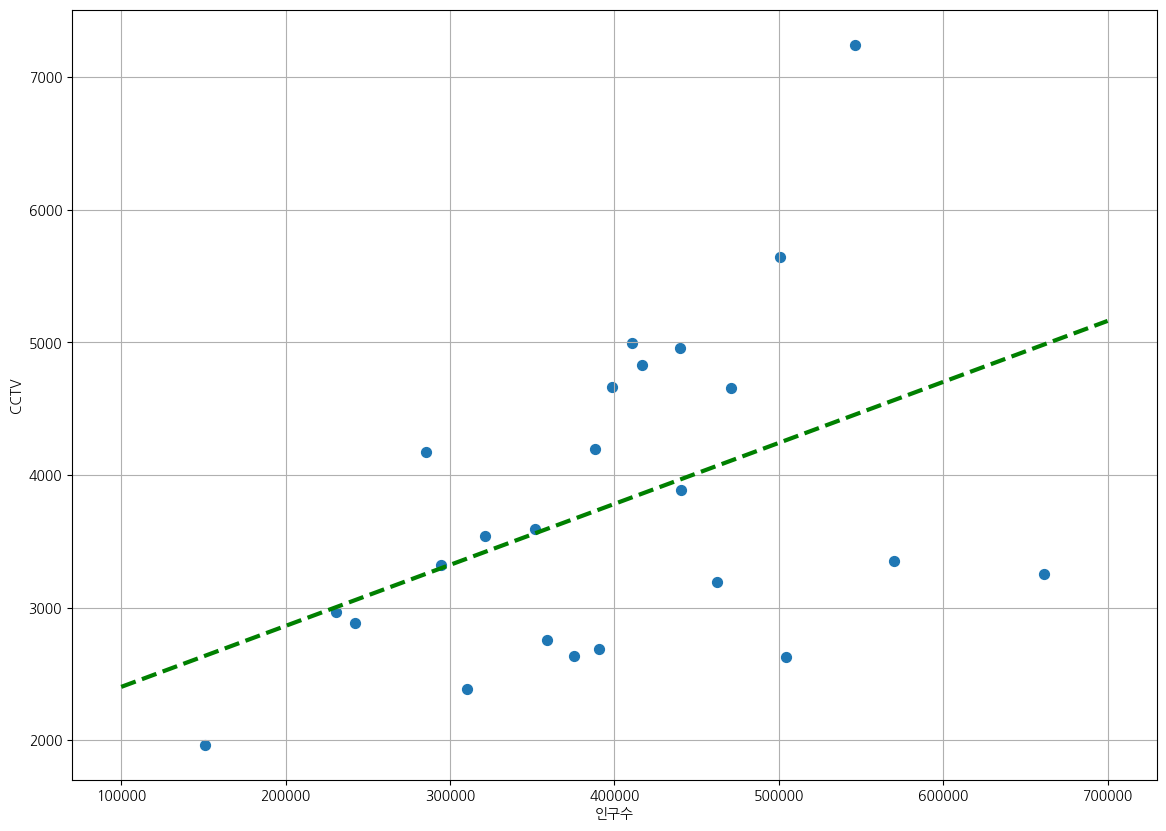

In [62]:
drawGraph8()

In [101]:
fp1 = np.polyfit(data_result["인구수"], data_result["총계"], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

#"총계" is actual data, "인구수" is approximated data
data_result["오차"] = data_result["총계"] - f1(data_result["인구수"])

#Calculate error
df_descending = data_result.sort_values(by="오차", ascending=False)
df_ascending = data_result.sort_values(by="오차", ascending=True)

In [64]:
df_descending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,7243.0,15.684395,546291,540957,5334,85288,0.976403,15.612192,1.325850,2788.810102
관악구,5642.0,23.863886,500582,485172,15410,84664,3.078417,16.913113,1.127088,1397.993245
서초구,4995.0,40.585421,410766,406404,4362,64761,1.061918,15.765911,1.216021,1163.993072
성북구,4957.0,20.666991,440089,427671,12418,79739,2.821702,18.118835,1.126363,991.157476
구로구,4831.0,33.342534,416815,393929,22886,79150,5.490685,18.989240,1.159027,972.178029


In [65]:
df_ascending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
송파구,3253.0,26.477449,661515,655744,5771,107605,0.872391,16.266449,0.491750,-1731.023025
노원구,2626.0,16.763006,504423,499989,4434,95384,0.879024,18.909526,0.520595,-1635.668779
강서구,3353.0,47.384615,569978,564339,5639,100929,0.989336,17.707526,0.588268,-1210.109544
동작구,2690.0,18.973905,390740,380154,10586,69944,2.709218,17.900394,0.688437,-1048.921614
마포구,2638.0,13.024850,375639,364257,11382,57462,3.030037,15.297134,0.702270,-1031.482868


In [139]:
# define colormap user
color_step = ["#e74c3c", "#ccc42e", "#95a5a6", "#2ecc71", "#3498db", "#3498db"]
my_colormap = ListedColormap(color_step)

In [140]:
def drawGraph9():
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(25, 15))
    plt.scatter(data_result["인구수"], data_result["총계"], c=data_result["오차"],
                s=50, cmap=my_colormap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='gray')

    for n in range(5):
        plt.text(df_descending["인구수"][n] * 1.02,         #x value
                 df_descending["총계"][n] * 0.98,           #y value
                 df_descending.index[n], fontsize=10)      #
        
        plt.text(df_ascending["인구수"][n] * 1.02,
                 df_ascending["총계"][n] * 0.98,
                 df_ascending.index[n], fontsize=10)
        
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()                                              #plot and deleate parameter value

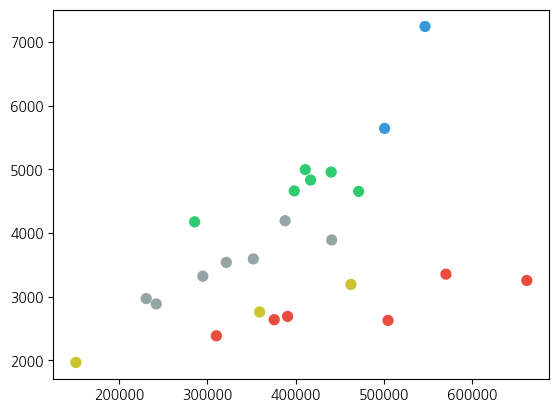

In [141]:
plt.scatter(data_result["인구수"], data_result["총계"], c=data_result["오차"],
            s=50, cmap=my_colormap)

/tmp/ipykernel_3853/438670084.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_descending["인구수"][n] * 1.02,          #x value
/tmp/ipykernel_3853/438670084.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_descending["총계"][n] * 0.98,           #y value
/tmp/ipykernel_3853/438670084.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_ascending["인구수"][n] * 1.02,
/tmp/ipykernel_3853/438670084.py:14: Fu

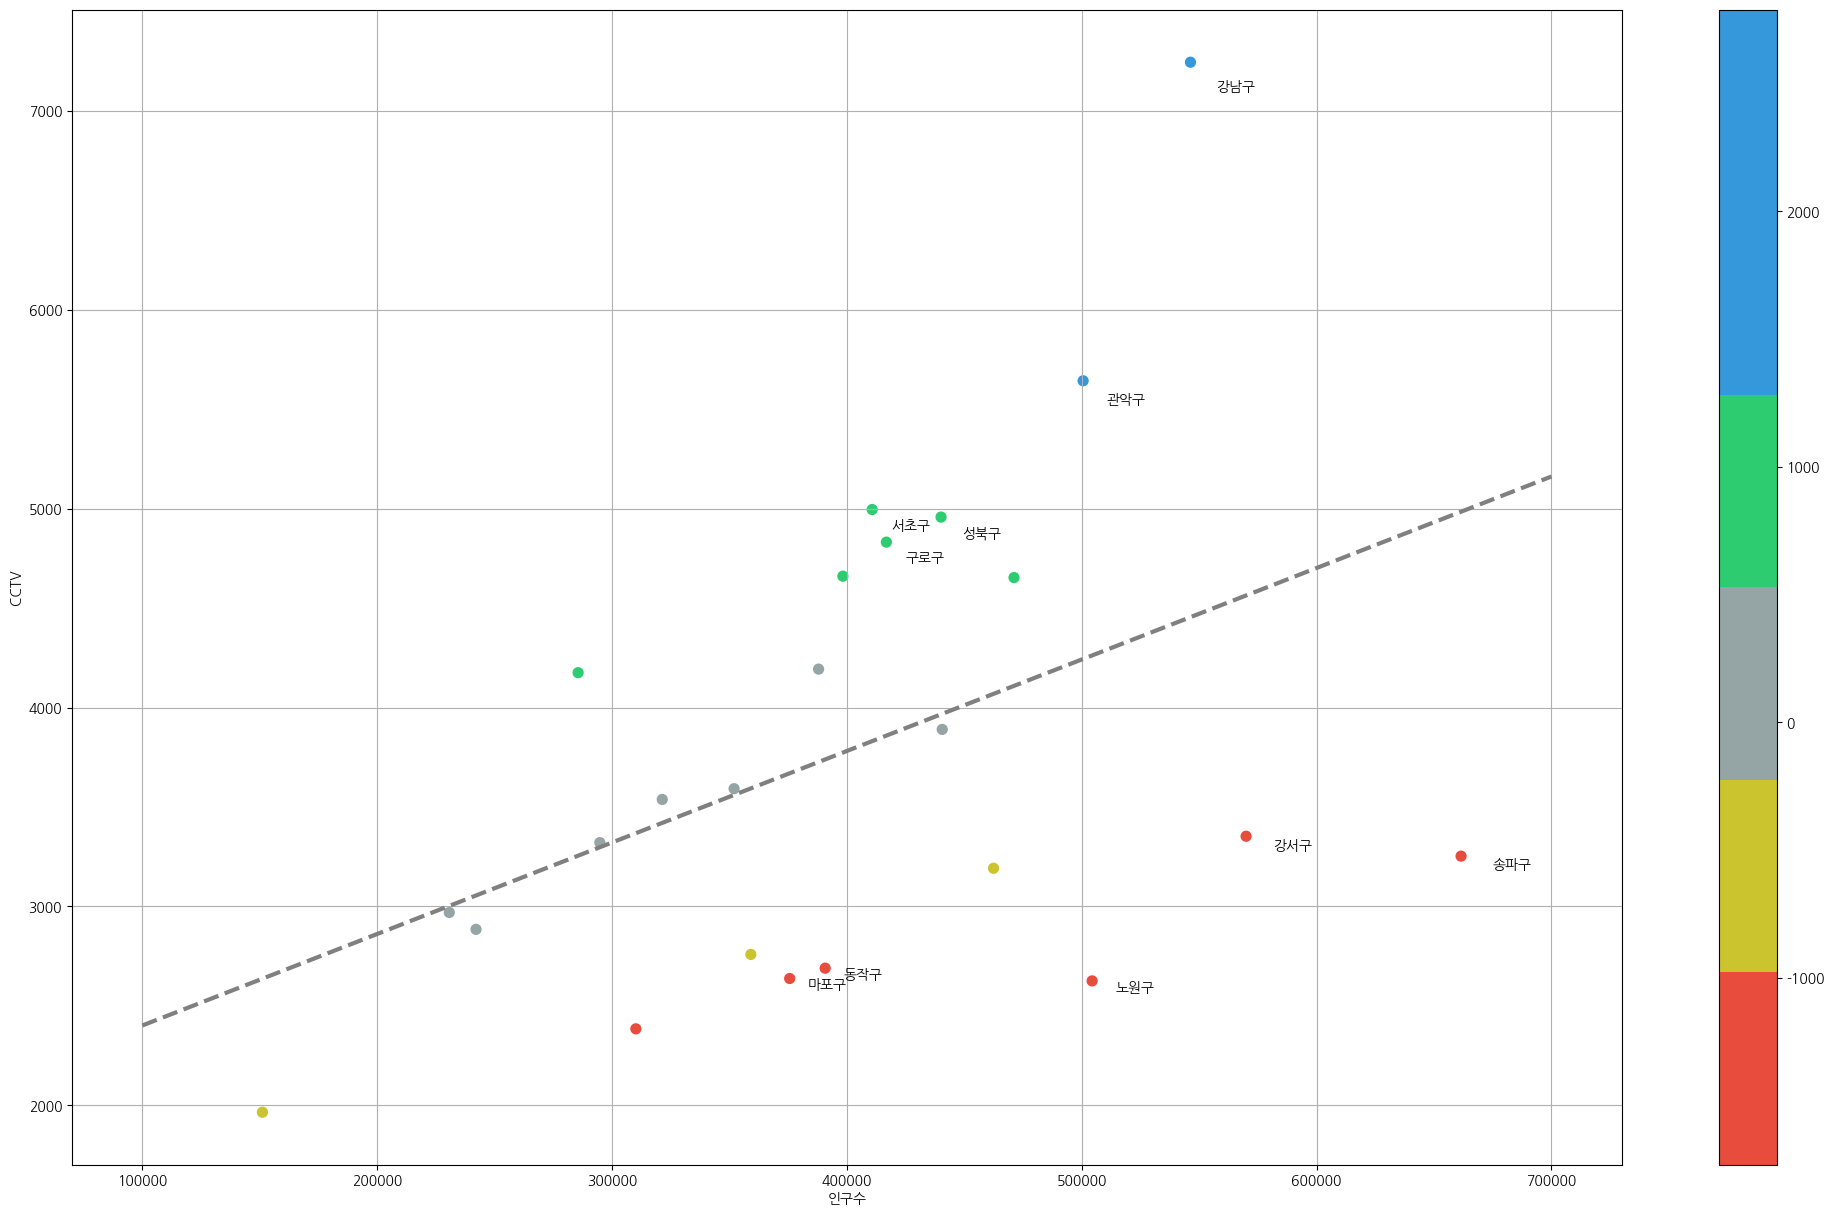

In [142]:
drawGraph9()

In [143]:
data_result.to_csv("../data/01.CCTV_result.csv", sep=",", encoding="utf-8")

In [144]:
%ls ../data/

 01.CCTV_result.csv  '01. Seoul_CCTV.csv'  '01. Seoul_Population.xlsx'
